In [0]:
# Procedure:
# 1. [date, string lists] --> [date, string]
# 2. EDA on text lengths per day pick the 90th percentile --> for Tokenizer setup

In [0]:
import google.colab as colab
import shutil
import os
import pandas as pd
import random
import numpy as np
import re
from matplotlib import pyplot as plt
import datetime

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Mount Google Drive

In [0]:
def mount_google_drive():
	'''
	# Functionality
		Mount google drive. Since colab does not save files, we want to make it easier to directly access files in google drive.
	# Arguments
		Nothing
	# Returns
		drive_root: the working directory mounted
	'''
	mount_directory = "/content/gdrive"
	drive = colab.drive
	drive.mount(mount_directory, force_remount=True)
	drive_root = mount_directory + "/" + list(filter(lambda x: x[0] != '.', os.listdir(mount_directory)))[0]
	return drive_root

def get_all_files_from_dir(directory):

    '''
    # Functionality
    Get the whole list of files in a folder
	# Arguments
		directory: string.  (e.g.,Users/laowang/~vgg/data/flowers/102/102flowers.tgz)
	# Returns
		None
	'''
    file_paths = []
    for root, dirs, files in os.walk(directory):
        file_paths += [os.path.join(root, x) for x in files]
    return sorted(file_paths)

In [0]:
ROOT_DIR =  mount_google_drive() + "/ECE457B-Project/"
DATASET_DIR = ROOT_DIR + "sec8ks/"
print(DATASET_DIR)

Mounted at /content/gdrive
/content/gdrive/My Drive/ECE457B-Project/sec8ks/


## EDA on text lengths


In [0]:
results = np.load(ROOT_DIR + "sec.npy", allow_pickle=True).tolist()

In [0]:
len(results)

47

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') # ??
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    text = text.lower() # lowercase text
    text = re.sub(REPLACE_BY_SPACE_RE, " ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE, "", text)      # delete symbols which are in BAD_SYMBOLS_RE from text
    text = " ".join([word for word in text.split(" ") if word not in STOPWORDS]) # delete stopwords from text
    text = re.sub(' +', ' ', text)
    return text

In [0]:
def date_prepare(date_string):
  new_str = date_string[:4] + "-" +  date_string[4:6] + "-" + date_string[6:]
  return datetime.datetime.strptime(new_str, '%Y-%m-%d').date()

In [0]:
modified_results = []

for element in results:
  modified_results.append([date_prepare(element[0]), text_prepare(element[1])])

In [0]:
modified_results

[[datetime.date(2010, 1, 19),
  'indenture salesforcecom inc us bank national association dated january 19 2010 purchase agreement dated january 12 2010 salesforcecom inc merrill lynch pierce fenner smith incorporated representative several initial purchasers named schedulea thereto form convertible bond hedge confirmation form warrant confirmation press release dated january 19 2010 announcing closing offering notes'],
 [datetime.date(2010, 1, 19),
  'indenture salesforcecom inc us bank national association dated january 19 2010 purchase agreement dated january 12 2010 salesforcecom inc merrill lynch pierce fenner smith incorporated representative several initial purchasers named schedulea thereto form convertible bond hedge confirmation form warrant confirmation press release dated january 19 2010 announcing closing offering notes'],
 [datetime.date(2010, 4, 21), 'press release dated april 21 2010'],
 [datetime.date(2010, 4, 21), 'press release dated april 21 2010'],
 [datetime.date(

In [0]:
np.save(ROOT_DIR + "sec_modified.npy", np.array(modified_results))

In [0]:
text_lengths = []

for element in modified_results:
  text_lengths.append(len(element[1].split()))

(array([11.,  7.,  4.,  5.,  0.,  5.,  4.,  2.,  0.,  2.,  3.,  0.,  0.,
         2.,  0.,  0.,  1.,  1.]),
 array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
        90, 95]),
 <a list of 18 Patch objects>)

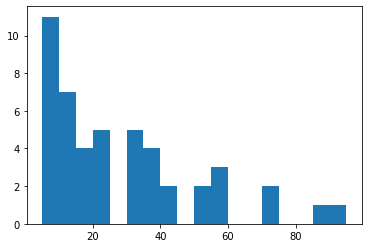

In [0]:
binwidth = 5
plt.hist(text_lengths, bins=range(min(text_lengths), max(text_lengths) + binwidth, binwidth))